# Lab 4 

In [36]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

## Task 1: Load and Explore the Dataset

In [37]:
df = pd.read_csv(r'C:\Users\solve\Downloads\winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
df.info()
# Sjekker for null verdier
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Task 2 - Preprocess the Data

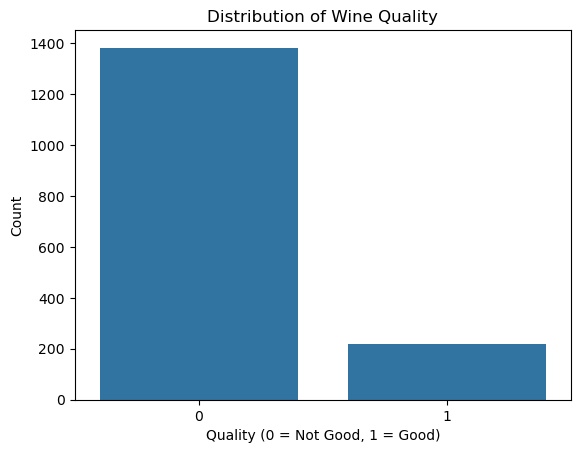

In [39]:
# Omgjør int i Quality kolonnen til binær klassifikasjon:
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)

# Plotter distrubusjon:
sns.countplot(x='quality_binary', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.show()

## Feature Scaling - Data Standardization

In [40]:
# Separerer målvariabelen fra datasettet:
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Standardiserer datasettet:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sammenligner data før og etter skalering
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(5))
print("After Scaling:\n", X_scaled_df['pH'].head(5))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64
After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
Name: pH, dtype: float64


## Task 4 - Split the dataset

In [41]:
# Deler datasettet for å trene modellen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



## Task 5 - Apply K-Nearest Neighbors (KNN) Classifier 

K-Nearest Neighbors - Klassifikator er en maskinlæringsmodell som ikke lærer av treningsdataene men bruker de direkte i sammenligning med ny data for å klassifisere noe. 

In [42]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Use GridSearchCV to find the optimal K, bruker cross-validation. 
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# Get the optimal K, tallet som velger antall datapunkter å sammenligne med.
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal K: {optimal_k}")

Optimal K: 4


In [43]:
# Trener modellen med optimal K funnet tidligere. 
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions
y_pred = knn_optimal.predict(X_test)

# Evaluerer modellen ved bruk av Accuracy Score og Confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.88125
Confusion Matrix:
[[398  15]
 [ 42  25]]


In [ ]:
## Taks 6 - Spply Support Vector Machine (SVM) Classifier 